# Miracle of Microfinance


##### Fardin Kabir, Kanav Patel, Lorraine Luo and Luigi Vicencio

## Introduction

As economics students we are passionate to learn more about how the concepts taught in classes are applied in the real world. We decided to focus on macroeconomic and finance datasets as we are all interested in building a project that would be relevant to some of the work we would be exposed to after graduating from university. One important topic in finance is microfinance. According to Precedence Research (2024), the global market of microfinance institutions (MFIs) is expected to increase at CAGR of 11% in the next 10 years, reaching USD 646.25 billion of market size. 

We chose to work with the research of Banerjee et al. (2015) on microfinance that studies a randomized evaluation of a group lending microcredit program in 52 randomly selected neighborhoods in Hyderabad, India. The data collection worked in three stages: baseline, endline 1 (EL1) and endline 2 (EL2). The baseline consists of data collection during 2005, and then Spandana, a major Indian MFI moved into treatment areas in 2006. From August 2007 to April 2008, the data for endline 1 was collected, and in May, Spandana started to moved into control area. After two years, the data for endline 2 was collected. We can summarize their findings in three axes (1) dubious change in business and consumption, (2) demand for microloans is not universal, and (3) no major effect on social indicators. In this project, we are going to evaluate these three myths by making visualizations of their research. In addition, we are going to map our data into Hyderabad with randomized points.

Regarding **Myth One: Consumption and Business**, while the treatment had a discernible effect on assets and profits within businesses, other variables showed no significant differences. The impact on the number of employees was not statistically significant, suggesting that any changes were not substantial.

Regarding **Myth Two: Demand for Microloans**, in endline 1, significant differences in credit access were observed, particularly with Spandana showing a 12.7% increase and all MFIs an 8.4% increase. However, by endline 2, these differences diminished, with no significant difference in the probability of obtaining loans from all MFIs and a decrease to 6.3% in the probability of obtaining a Spandana loan. Both endlines exhibited negative differences in the overall probability of getting a loan. Moreover, the borrowing behavior of treatment households from informal and banks markets remained consistent across both endlines. While in endline 1, there was a substantial difference in borrowing from Spandana and all MFIs,  Rs. 1,334 and Rs. 1,286, respectively, by endline 2, these differences decreased to Rs. 979 and Rs. 799, indicating a negative trend in borrowing patterns. Overall, there was either a decrease or no difference in credit access and loan amounts from endline 1 to endline 2, showing that the demand for microloan is not universal, as only 38% of households borrowed from an MFI by the survey's conclusion, contrary to the projected 80% by Banerjee et al. (2015).

Regarding **Myth Three: Social Effects**, there were mixed findings regarding the impact of the treatment. While there was no significant difference in the likelihood of children aged 5-15 attending school. Moreover, the women's independence index, encompassing 16 social outcomes, showed a marginal improvement, possibly attributed to increased self-employment activities among women. We are going to explore this increase in self-employment activities in our visualizations.

In the next section, we are going to map the data into geographical regions. Then, we explore each myth in detail by making visualizations. At the end, we conclude with our main findings and propose some topics to future research. 

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Mapping the Data

In [2]:
# Kanav

## Myth One: Business and Consumption

In [3]:
# Lorraine

## Myth Two: Demand for Microloans

The second myth of microfinance is that it increases the demand for loans. Initially, Spandana believed that 80% of eligible households would become clients immediately after the launch. Yet, data shows that after 18 months, only 18% of eligible households became clients. Moreover, after two and a half years, the proportion stayed at the same level of 18% (Banerjee et al., 2015). 


#### Endline 1

First, we are going to investigate credit access and loan amounts in endline 1, and then the same for endline 2 from Banerjee et al. (2015). 

In [4]:
# Creating Table 2 - Endline 1 - Credit Acess
credit_endline1 = {
    'Variable': ['Spandana', 'Other_MFI', 'Any_MFI','Other_Bank','Informal',
                'Total','LatePayment','N_cycles_MFI','index_dependent'],
    'Treatment': [0.127,-0.012, 0.084, 0.003, -0.052,-0.023,0.052,0.084,0.0881],
    'SE': [0.020,0.024,0.027,0.012,0.021,0.014,0.018,0.041,0.0289],
    'N': [6811, 6657, 6811, 6811, 6811, 6862, 6475, 6811, 6862]

}

# Panda Data Frame
credit_endline1 = pd.DataFrame(credit_endline1)

# Calculating confidence intervals with 95% confidence level
credit_endline1['Lower_CI'] = credit_endline1['Treatment'] - 1.96 * (credit_endline1['SE'] / np.sqrt(credit_endline1['N']))
credit_endline1['Upper_CI'] = credit_endline1['Treatment'] + 1.96 * (credit_endline1['SE'] / np.sqrt(credit_endline1['N']))

credit_endline1

,Variable,Treatment,SE,N,Lower_CI,Upper_CI
0,Spandana,0.1270,0.0200,6811,0.126525,0.127475
1,Other_MFI,-0.0120,0.0240,6657,-0.012577,-0.011423
2,Any_MFI,0.0840,0.0270,6811,0.083359,0.084641
3,Other_Bank,0.0030,0.0120,6811,0.002715,0.003285
4,Informal,-0.0520,0.0210,6811,-0.052499,-0.051501
5,Total,-0.0230,0.0140,6862,-0.023331,-0.022669
6,LatePayment,0.0520,0.0180,6475,0.051562,0.052438
7,N_cycles_MFI,0.0840,0.0410,6811,0.083026,0.084974
8,index_dependent,0.0881,0.0289,6862,0.087416,0.088784


**Description of the variables**
- Spandana refers to the probability of having at least one loan from Spandana,
- Other_MFI refers to the probability of having at least one loan from other MFIs,
- Any_MFI refers to the probability of having at least one loan from all MFIs,
- Other_Bank refers to the probability of having at least one loan from other bank,
- Informal refers to the probability of having at least one loan from the informal market,
- Total refers to the overall probability of having at least one loan,
- LatePayment refers to the probability of making a late payment,
- N_cycles_MFI refers to the number of cycles borrowed from an MFI,
- index_dependent refers to the index of dependent variables.



Text(0.5, 1.0, 'Credit Acess: Endline 1')

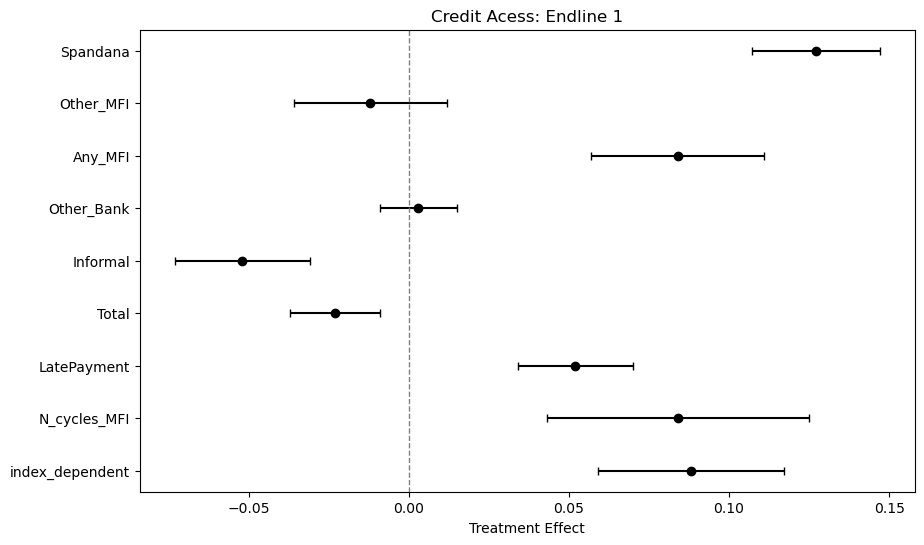

In [5]:
# Plotting a Forest Graph

fig,ax = plt.subplots(figsize = (10,6))

ax.errorbar(credit_endline1['Treatment'], credit_endline1.index, xerr = credit_endline1['SE'],fmt = 'o', color = 'black', capsize = 3)
ax.axvline(x = 0, color = 'grey', lw = 1, linestyle = "--")

ax.invert_yaxis()

ax.set_yticks(credit_endline1.index)
ax.set_yticklabels(credit_endline1['Variable'])

ax.set_xlabel('Treatment Effect')
ax.set_title('Credit Acess: Endline 1')

Regarding the credit access in endline 1, treatment households represented a significant increase of probability of having a loan from Spandana and all MFIs by 12.7% and 8.4%, respectively. Also, the number of cycles of MFI raised by 8.4%. It is important to highlight that the overall probability of getting a loan decreased by -2.3%. Although it seems that that households borrowed more from MFI, the overall take up rate from eligible households is only 26.4% (against the 80% expected), as pointed by Banerjee et al. (2015). Besides the difference in the probability of credit access, we are going to investigate the difference in how much the treatment household is borrowing. We are making the table for loan amounts for endline 1 below.

In [6]:
# Creating Table 2 - Endline 1 - Loan Amounts
loan_endline1 = {
    'Variable': ['Spandana', 'Other_MFI', 'Any_MFI','Other_Bank','Informal',
                'Total'],
    'Treatment': [1334,-94,1286,75,-1069,2856],
    'SE': [230,336,439,2163,2520,4548],
    'N': [6811,6708,6811,6811,6811,6862]
}

# Panda Data Frame
loan_endline1 = pd.DataFrame(loan_endline1)

# Calculating confidence intervals of 95% confidence level
loan_endline1['Lower_CI'] = loan_endline1['Treatment'] - 1.96 * (loan_endline1['SE'] / np.sqrt(loan_endline1['N']))
loan_endline1['Upper_CI'] = loan_endline1['Treatment'] + 1.96 * (loan_endline1['SE'] / np.sqrt(loan_endline1['N']))

loan_endline1

,Variable,Treatment,SE,N,Lower_CI,Upper_CI
0,Spandana,1334,230,6811,1328.537663,1339.462337
1,Other_MFI,-94,336,6708,-102.040792,-85.959208
2,Any_MFI,1286,439,6811,1275.574062,1296.425938
3,Other_Bank,75,2163,6811,23.630286,126.369714
4,Informal,-1069,2520,6811,-1128.848211,-1009.151789
5,Total,2856,4548,6862,2748.390362,2963.609638


**Description of the variables**
- Spandana refers to the loan amount from Spandana (in Rupees),
- Other_MFI refers to the loan amount from other MFIs (in Rupees),
- Any_MFI refers to the loan amount from all MFIs (in Rupees),
- Other_Bank refers to the loan amount from other banks (in Rupees),
- Informal refers to the loan amount from the informal market (in Rupees),
- Total refers to the overall loan amount (in Rupees).


Text(0.5, 1.0, 'Loan Amount: Endline 1')

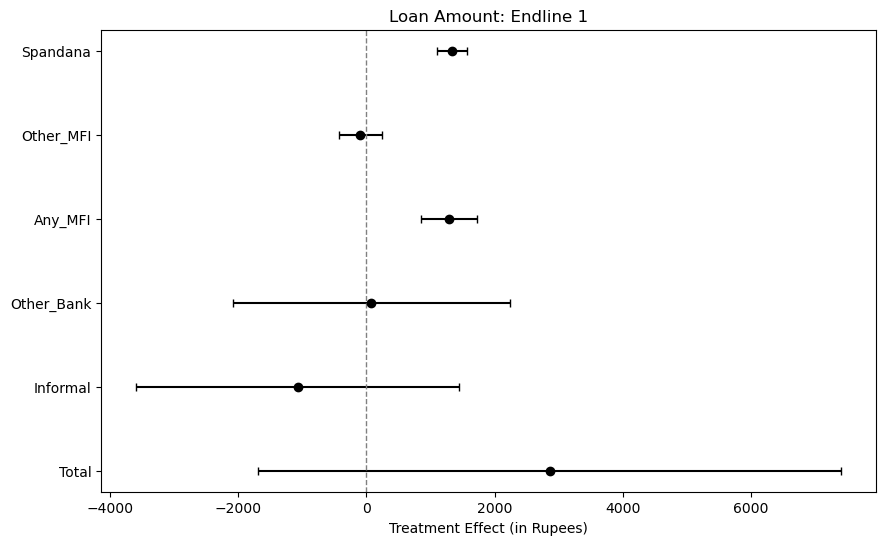

In [7]:
# Plotting a Forest Graph

fig,ax = plt.subplots(figsize = (10,6))

ax.errorbar(loan_endline1['Treatment'], loan_endline1.index, xerr = loan_endline1['SE'],fmt = 'o', color = 'black', capsize = 3)
ax.axvline(x = 0, color = 'grey', lw = 1, linestyle = "--")

ax.invert_yaxis()

ax.set_yticks(loan_endline1.index)
ax.set_yticklabels(loan_endline1['Variable'])

ax.set_xlabel('Treatment Effect (in Rupees)')
ax.set_title('Loan Amount: Endline 1')

Regarding the loan amount, there is no statistically significant differences in any variable, except for Spandana and all MFIs. Treatment households reported Rs. 1,334 more borrowing from Spandana than do control housefolds, and Rs. 1,286 more from all MFIs. The loan amount from the informal and bank market did not present any significant change. After two years, the same households were surveyed for endline 2, and we are using the panel data for endline 2 below.


#### Endline 2

In [8]:
# Creating Table 2 - Endline 2 - Credit Acess

credit_endline2 = {
    'Variable': ['Spandana', 'Other_MFI', 'Any_MFI', 'Other_Bank', 'Informal', 'Total', 'LatePayment', 'N_cycles_MFI', 'index_dependent'],
    'Treatment': [0.063, -0.039, 0.002, 0.001, 0.002, 0.000, 0.007, 0.085, 0.0288],
    'SE': [0.019, 0.026, 0.029, 0.009, 0.018, 0.010, 0.021, 0.067, 0.0253],
    'N': [6142, 6142, 6142, 6142, 6142, 6142, 6142, 5926, 6142]
}

# Panda Data Frame
credit_endline2 = pd.DataFrame(credit_endline2)

# Calculating confidence intervals for 95% confidence level
credit_endline2['Lower_CI'] = credit_endline2['Treatment'] - 1.96 * (credit_endline2['SE'] / np.sqrt(credit_endline2['N']))
credit_endline2['Upper_CI'] = credit_endline2['Treatment'] + 1.96 * (credit_endline2['SE'] / np.sqrt(credit_endline2['N']))

credit_endline2

,Variable,Treatment,SE,N,Lower_CI,Upper_CI
0,Spandana,0.0630,0.0190,6142,0.062525,0.063475
1,Other_MFI,-0.0390,0.0260,6142,-0.039650,-0.038350
2,Any_MFI,0.0020,0.0290,6142,0.001275,0.002725
3,Other_Bank,0.0010,0.0090,6142,0.000775,0.001225
4,Informal,0.0020,0.0180,6142,0.001550,0.002450
5,Total,0.0000,0.0100,6142,-0.000250,0.000250
6,LatePayment,0.0070,0.0210,6142,0.006475,0.007525
7,N_cycles_MFI,0.0850,0.0670,5926,0.083294,0.086706
8,index_dependent,0.0288,0.0253,6142,0.028167,0.029433


Text(0.5, 1.0, 'Credit Acess: Endline 2')

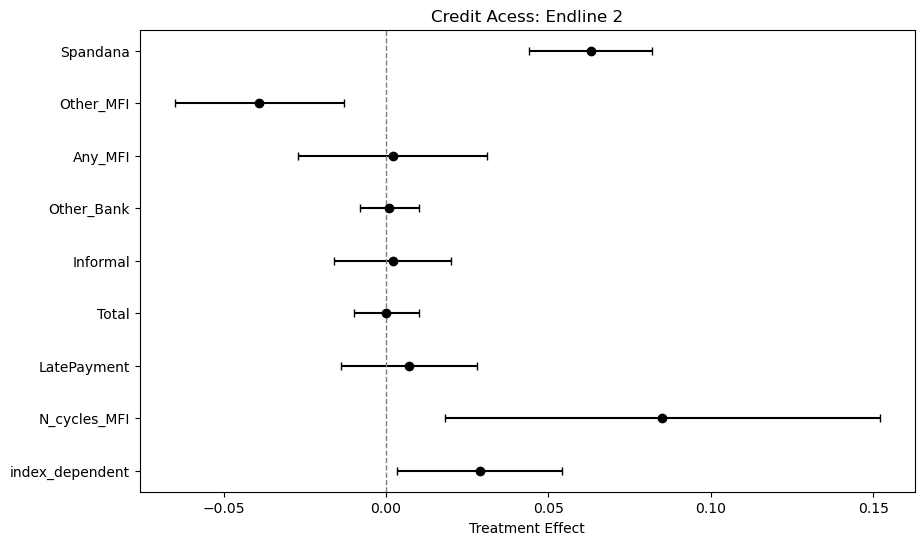

In [9]:
# Plotting a Forest Graph

fig,ax = plt.subplots(figsize = (10,6))

ax.errorbar(credit_endline2['Treatment'], credit_endline2.index, xerr = credit_endline2['SE'],fmt = 'o', color = 'black', capsize = 3)
ax.axvline(x = 0, color = 'grey', lw = 1, linestyle = "--")

ax.invert_yaxis()

ax.set_yticks(credit_endline2.index)
ax.set_yticklabels(credit_endline2['Variable'])

ax.set_xlabel('Treatment Effect')
ax.set_title('Credit Acess: Endline 2')

After two years, the probability of getting a loan from Spadana increased by 6.3%, and from other MFIs decreased by -3.9%. The probability of all MFI and overall market did not present any significant difference. Also, the number of cycles from a number of cycles borrowed from an MFI increased by 6.7%.

In [10]:
# Creating Table 2 - Endline 2 - Loan Amounts
loan_endline2 = {
    'Variable': ['Spandana', 'Other_MFI', 'Any_MFI', 'Other_Bank', 'Informal', 'Total'],
    'Treatment': [979, -217, 799, -1181, 158, 2554],
    'SE': [287, 628, 669, 1086, 2940, 6156],
    'N': [6142, 6142, 6142, 6142, 6142, 6142]
}

# Panda Data Frame
loan_endline2 = pd.DataFrame(loan_endline2)

# Calculating confidence intervals for 95% confidence level
loan_endline2['Lower_CI'] = loan_endline2['Treatment'] - 1.96 * (loan_endline2['SE'] / np.sqrt(loan_endline2['N']))
loan_endline2['Upper_CI'] = loan_endline2['Treatment'] + 1.96 * (loan_endline2['SE'] / np.sqrt(loan_endline2['N']))

loan_endline2

,Variable,Treatment,SE,N,Lower_CI,Upper_CI
0,Spandana,979,287,6142,971.822337,986.177663
1,Other_MFI,-217,628,6142,-232.705827,-201.294173
2,Any_MFI,799,669,6142,782.268793,815.731207
3,Other_Bank,-1181,1086,6142,-1208.160077,-1153.839923
4,Informal,158,2940,6142,84.472721,231.527279
5,Total,2554,6156,6142,2400.042881,2707.957119


Text(0.5, 1.0, 'Loan Amount: Endline 2')

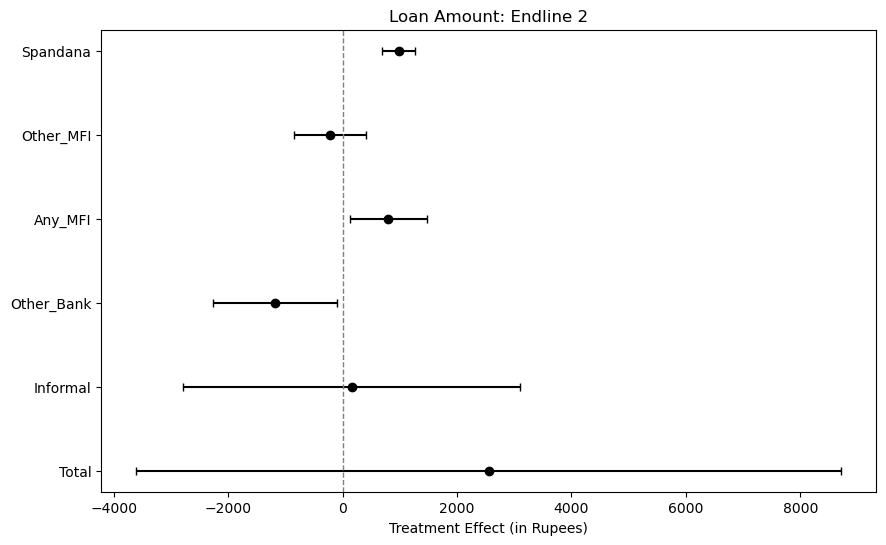

In [11]:
# Plotting a Forest Graph

fig,ax = plt.subplots(figsize = (10,6))

ax.errorbar(loan_endline2['Treatment'], loan_endline2.index, xerr = loan_endline2['SE'],fmt = 'o', color = 'black', capsize = 3)
ax.axvline(x = 0, color = 'grey', lw = 1, linestyle = "--")

ax.invert_yaxis()

ax.set_yticks(loan_endline2.index)
ax.set_yticklabels(loan_endline2['Variable'])

ax.set_xlabel('Treatment Effect (in Rupees)')
ax.set_title('Loan Amount: Endline 2')

Similarly, in terms of loan amount, treatment households reported Rs. 979 more borrowing from Spandana than do control households, and Rs. 799 more from all MFIs, which is statistically significant. Yet, the amount is lower than endline 1. Moreover, other variables presented no significant differences, including the total amount.

Although the credit access in endline 1 presented a significant difference in Spandana (12.7%) and all MFIs (8.4%), in endline 2, the probability of getting a loan from all MFIs did not present any significant difference, and the probability for Spandana loan decreased to 6.3%. In both endlines, there were no positive difference in the overall probability of getting a loan, and even in endline 1, the difference was negative. 

Furthermore, he amount that treatment households borrowed from the informal, bank and overall market did not present any major difference in both endlines. While in endline 1, the difference in borrowing from Spandana and all MFIs was Rs. 1,334 and Rs. 1,286, respectively, in endline 2, the difference was Rs. 979 and Rs. 799, showing a negative derivative in the borrowing. 

Both in terms of credit access and loan amount, there was a decrease in the scenario from endline 1 to endline 2, or even no difference at all in each of these scenarios. At the end of the survey, only 38% of households borrowed from an MFI, while it was expected a proportion of 80% as argued by Banerjee et al. (2015). Therefore, it seems that demand for microloan is not universal as predicted. According to Banerjee et al. (2015), there are two possible explanations for this finding (1) the amount borrowed would not yield the rate of return of 24 per cent, which is the interest charged by Spandana, and (2)  households prefer the informal market of friends, family or moneylenders who have greater flexibility, even with a higher interest rate and the possibility of embarrassment.

## Myth Three: Social Effects

In [12]:
# Fardin

## Conclusion

Regarding the three myths examined, firstly, microfinance impacted assets and profits within businesses, yet failed to significantly affect other variables, such as the number of employees. 

Secondly, initial differences in credit access for Spandana and all MFIs diminished by endline 2, indicating a decrease in loan acquisition probabilities, while borrowing behavior from informal and bank markets remained consistent, with decreasing differences in borrowing amounts between endlines. This challenges the assumed universality of microloan demand, with only 38% of households borrowing from an MFI by the survey's conclusion, contrary to expectations.

Secondly, initial differences in credit access between Spandana and all MFIs in endline 1 diminished in endline 2, indicating a decline in loan acquisition probabilities. Furthermore, consistent borrowing behavior from informal and bank markets, with diminishing differences in borrowing amounts between endlines, underscores that demannd for microloans was not universal.

Lastly, while no significant difference was observed in the school attendance of children aged 5-15, the women's independence index marginally improved, probably due to increase in self-employment activities.

For future research, we have two proposals (1) analyze other Indian cities to solidify the results and conclusion of the experiment, and (2) investigate why the informal loan market is preferred, even with the drawback of the embarrassment and higher rates.

## References

Banerjee, A., Duflo, E., Glennerster, R., & Kinnan, C. (2015). The miracle of microfinance? Evidence from a randomized evaluation. _American Economic Journal. Applied Economics, 7(1), 22-53. https://doi.org/10.1257/app.20130533

Precedence Research. (2024). _Microfinance market_. https://www.precedenceresearch.com/microfinance-market#:~:text=The%20global%20microfinance%20market%20size,period%20from%202023%20to%202032